In [1]:
import numpy as np

from nbodykit.lab import ArrayCatalog

from matplotlib import pyplot as plt

# Painting particle positions to mesh

In [2]:
gas_file : str = "data/npy/ppos_lr_sightline_20mpc.npy"
temp_file : str = "data/npy/gasen_lr_sightline_20mpc.npy"

# Assume the file can be loaded using np.load
ppos = np.load(gas_file)
gasen = np.load(temp_file)

Lx = 120000 # kpc
Ly =  20000 # kpc
Lz =  20000 # kpc

ppos[:, 0] = ppos[:, 0] + Lx / 2
ppos[:, 1] = ppos[:, 1] + Ly / 2
ppos[:, 2] = ppos[:, 2] + Lz / 2

In [3]:
# create catalog from in-memory particles
cat = ArrayCatalog(
    {
        "Position": ppos,   # positions of gas particles
         "InternalEnergy": gasen # positions of gas internal energy
    }
)
cat.attrs["BoxSize"] = 120000

In [4]:
# Size of the mesh (Nmesh, Nmesh, Nmesh)
Nmesh: int = 1024

# Interpolation window
resampler: str = "tsc"

# Gas particle mesh
mesh = cat.to_mesh(Nmesh=Nmesh, resampler=resampler)

# Gas internal energy mesh
gasen_mesh = cat.to_mesh(compensated=True, Nmesh=Nmesh, resampler='tsc', position='Position', value='InternalEnergy')

In [5]:
# Gas particle field
painted_field = mesh.paint(mode="real")

# Gas Internal Energy field
gasen_painted_field = gasen_mesh.paint(mode="real")

In [6]:
# Note that our input data does not cover full range of the box.
# We cut the box into a smaller tube, so also need to 
painted_field.shape, gasen_painted_field.shape

ind = int(Ly / Lx * Nmesh)

gas_volume   = painted_field[:, :ind, :ind]
gasen_volume = gasen_painted_field[:, :ind, :ind]

## 2D viz to make sure the resolution is what you want

In [7]:
from matplotlib.colors import LogNorm

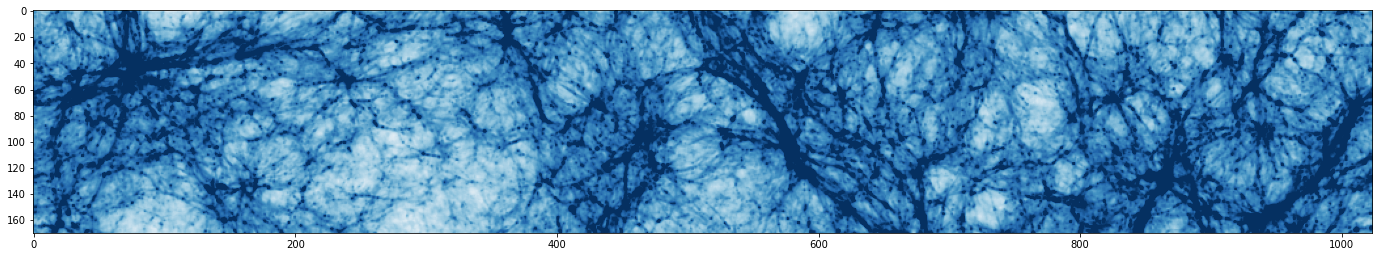

In [8]:
plt.figure(figsize=(24, 9))
plt.imshow(painted_field.preview(axes=(0, 1))[:, :ind].T, norm=LogNorm(vmin=1e2, vmax=1e4), cmap="RdBu")

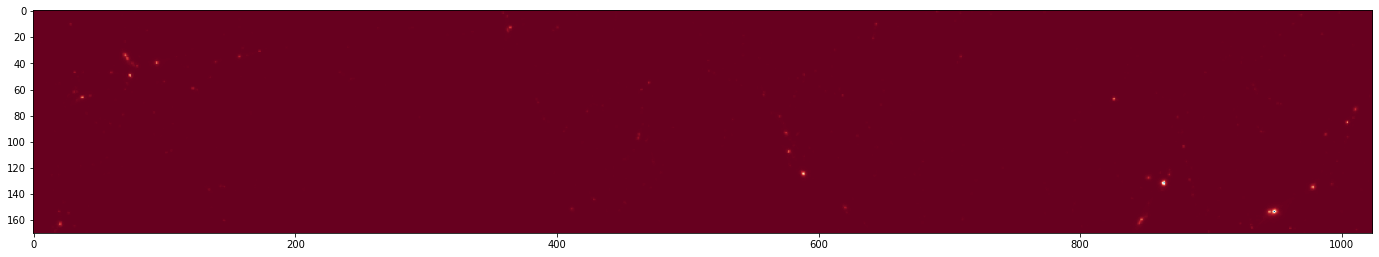

In [9]:
plt.figure(figsize=(24, 9))
preview = gasen_painted_field.preview(axes=(0, 1))[:, :ind].T
plt.imshow(preview, cmap="RdBu")

## Saving the mesh file

In [10]:
import h5py

with h5py.File("data/npy/Lya_tube_volume.hdf5", "w") as f:
    f.create_dataset("gas", data=volume)
    f.create_dataset("gasen", data=gasen_volume)

NameError: name 'volume' is not defined

In [ ]:
!ls -lh data/npy/